# Primera Pre-Entrega Dente Alan

# Objetivo

Predecir el salario a partir de la zona Geográfica, el Sector y Trabajo a realizar

### Contexto Laboral

En un mundo donde la información fluye cada vez mas rápido, las personas que trabajan con datos se elevan como una guía para las empresas. Desde el amanecer de la era digital, la humanidad ha acumulado más información de la que jamás podría haber imaginado, y con ello, un nuevo reto surgió: ¿Cómo encontrar sentido en ese caos? Aquí es donde entra el labor de los profecionales de datos, el explorador moderno que navega por este océano buscando patrones ocultos, conexiones insospechadas y conocimientos que transforman industrias enteras.

### Contexto analítico

Para poder desarrollar el modelo, el data set cuenta con un rango aproximado de 740, las variables tomadas fueron 28:

| ID | Variable | Descripción |
|----|----------|-------------|
|1| Job Title| Titulo del trabajo| 
|2| Salary Estimate | Salario Estimado|
|3| Job Description | Descripción del trabajo| 
| 4|  Rating | Ratio del trabajo | 
| 5 |  Company Name | Nombre de la compañia | 
| 6 |  Location | Localidad del trabajador | 
| 7 |  Headquarters | Localidad de las Oficinas centrales | 
| 8 |  Size | Tamaño de la compañia | 
| 9 |  Founded | Año de fundación de la compañia | 
| 10 |  Type of ownership | Tipo de compañia | 
| 11 |  Industry | Tipo de industria de la compañia | 
|  12 |  Sector | Sector industrial de la compañia | 
| 13 |  Revenue | Ingreso de la compañia | 
| 14 |  Competitors | Competencias de la compañia | 
| 15 |  Hourly | ¿Pago por Hora? | 
| 16 |  Employer_provided | Beneficios provistos | 
| 17 |  Min_salary | Salario minimo del empleo medido en Miles de U$D| 
| 18 |  Max_salary | Salario Maximo del empleo medido en Miles de U$D | 
| 19 |  Avg_salary | Salario promedio del empleo medido en Miles de U$D | 
| 20 |  company_txt | Nombre de la compañia | 
| 21 |  Job_state | Estado de la compañia | 
| 22 |  Same_state | ¿Trabajador en mismo Estado que la compañia? | 
| 23 |  Age | Edad del trabajador | 
| 24 |  Python_yn | Conocimiento de Python | 
| 25 |  R_yn| Conocimiento de R| 
| 26 |  Spark | Conocimiento de Spark| 
| 27 |  Aws | Conocimiento de Aws| 
| 28 |  Excel| Conocimiento de Excel| 

#### Importación de bibliotecas

In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
mpl.style.use('bmh')

## Formulación preguntas de interés

1 - ¿Existe relación entre la edad y el salario?

2 - ¿Existe relación entre el tipo de trabajo y salario?

3 - ¿Existe relación entre el sector industrial y salario? 

4 - ¿Existe relación entre el Estado (USA) y el Salario?

5 - ¿Existe relación entre si el trabajo está ubicado en el mismo estado que se vive y el salario?

### Importamos el DataSet

In [34]:
# Leer el archivo CSV
df = pd.read_csv('salary_data.csv', sep=',')

#### Reviso la columna de **age**

In [60]:
print(df[['age']]) 

     age
0     47
1     36
2     10
3     55
4     22
..   ...
737  190
738   14
739   36
740   -1
741   53

[742 rows x 1 columns]


Como en la columna "age" tengo varios valores atípicos como edades de *-1*, *190*. Realizo el primer filtrado de datos. Tomaré como criterio, las edades entre 18 años y 65 años

In [61]:
df1 = df[(df['age']>=18) & (df['age']<=65)]

print(df1[['age']])

     age
0     47
1     36
3     55
4     22
5     20
..   ...
723   62
724   44
731   32
739   36
741   53

[290 rows x 1 columns]


In [62]:
print(df1[['min_salary', 'max_salary', 'avg_salary','age']]) 

     min_salary  max_salary  avg_salary  age
0            53          91        72.0   47
1            63         112        87.5   36
3            56          97        76.5   55
4            86         143       114.5   22
5            71         119        95.0   20
..          ...         ...         ...  ...
723          56          99        77.5   62
724          25          28        26.5   44
731          61         119        90.0   32
739          56          91        73.5   36
741          61         126        93.5   53

[290 rows x 4 columns]


Ahora vamos a ver si existe alguna relación entre la edad y el salario promedio


Defino los ejes:

X = age

Y = avg_salary

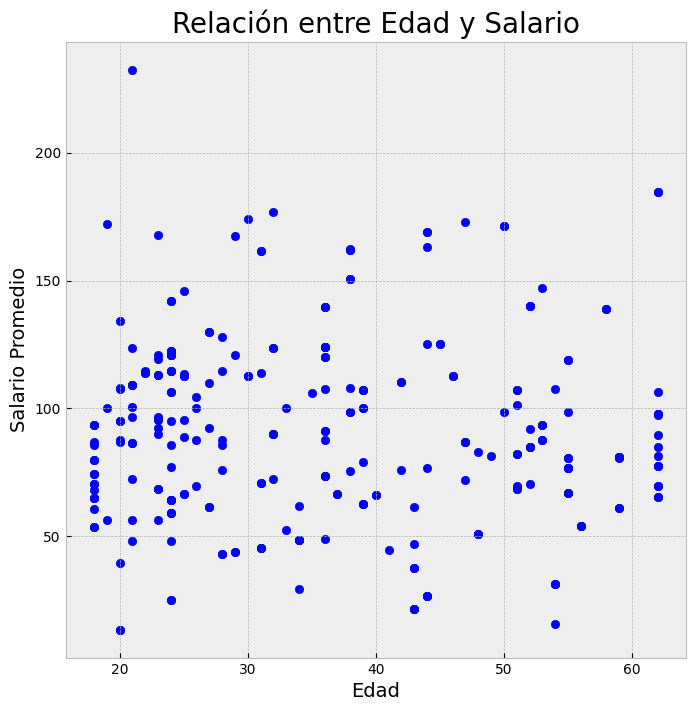

In [63]:
plt.figure(figsize=(8,8))
plt.scatter(df1['age'],df1['avg_salary'], color='b', marker='o')

plt.title('Relación entre Edad y Salario', fontsize=20)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Salario Promedio', fontsize=14)

plt.grid(True)
plt.show()

> Respondiendo a la pregunta (1) Se puede observar que que no existe una relación entre Edad y el Salario

#### Relación entre los trabajos mas frecuentes

Primero obtengo cuales son los trabajos mas frecuentes en nuestra tabla

In [64]:
#print(df1[['Job Title']])
conteo = df1['Job Title'].value_counts()
frecuentes = conteo[conteo >= 5].index
print(frecuentes)

df_filtrado = df1[df1['Job Title'].isin(frecuentes)]

print(df_filtrado)

Index(['Data Scientist', 'Data Engineer', 'Senior Data Scientist',
       'Data Analyst'],
      dtype='object', name='Job Title')
                 Job Title               Salary Estimate  \
0           Data Scientist    $53K-$91K (Glassdoor est.)   
3           Data Scientist    $56K-$97K (Glassdoor est.)   
4           Data Scientist   $86K-$143K (Glassdoor est.)   
5           Data Scientist   $71K-$119K (Glassdoor est.)   
11          Data Scientist   $64K-$106K (Glassdoor est.)   
..                     ...                           ...   
685         Data Scientist    $51K-$88K (Glassdoor est.)   
686         Data Scientist  $101K-$141K (Glassdoor est.)   
688          Data Engineer   $79K-$147K (Glassdoor est.)   
706          Data Engineer   $76K-$142K (Glassdoor est.)   
707  Senior Data Scientist  $108K-$171K (Glassdoor est.)   

                                       Job Description  Rating  \
0    Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
3    *Organizati

ahora voy a plotear en un grafico de cajas de salarios de cada trabajo

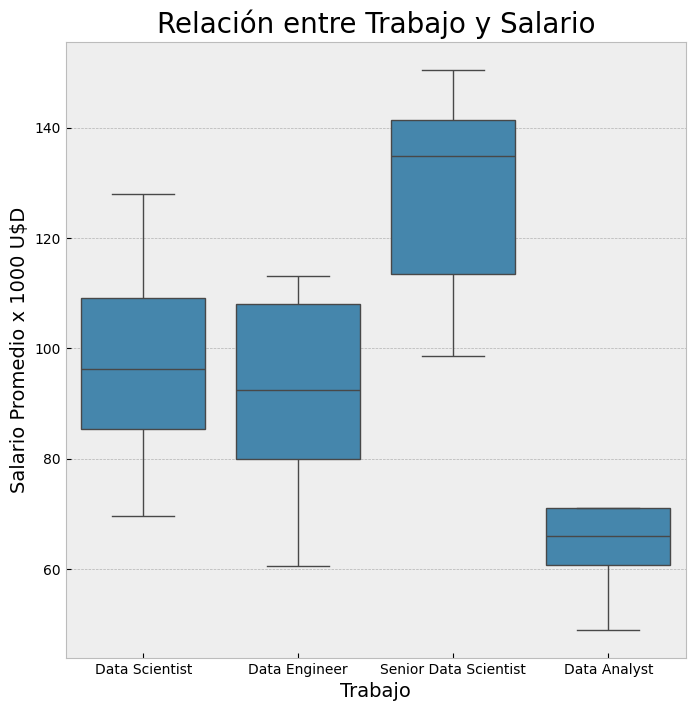

In [65]:
plt.figure(figsize=(8,8))
sns.boxplot(data = df_filtrado,
            x = 'Job Title',
            y = 'avg_salary',
            showfliers = False)

plt.title('Relación entre Trabajo y Salario', fontsize=20)
plt.xlabel('Trabajo', fontsize=14)
plt.ylabel('Salario Promedio x 1000 U$D', fontsize=14)

plt.show()


> Respondiendo a la pregunta número (2), se puede observar desde el grafico que el trabajo con mayor salario es el **Senior Data Scientist**. 
Mientras que el trabajo con menor salario es **Data Analyst**

### Ahora veremos si existe una relación entre el sector industrial y el salario. Veremos los sectores que mas se repiten en la tabla

In [74]:
conteo2 = df1['Sector'].value_counts()
#print(conteo2)
frecuentes2 = conteo2[conteo2 >= 10].index
print(frecuentes2)

df_filtrado2 = df1[df1['Sector'].isin(frecuentes2)]

Index(['Information Technology', 'Business Services',
       'Biotech & Pharmaceuticals', 'Health Care', 'Insurance', 'Finance',
       'Education', 'Oil, Gas, Energy & Utilities', 'Government'],
      dtype='object', name='Sector')


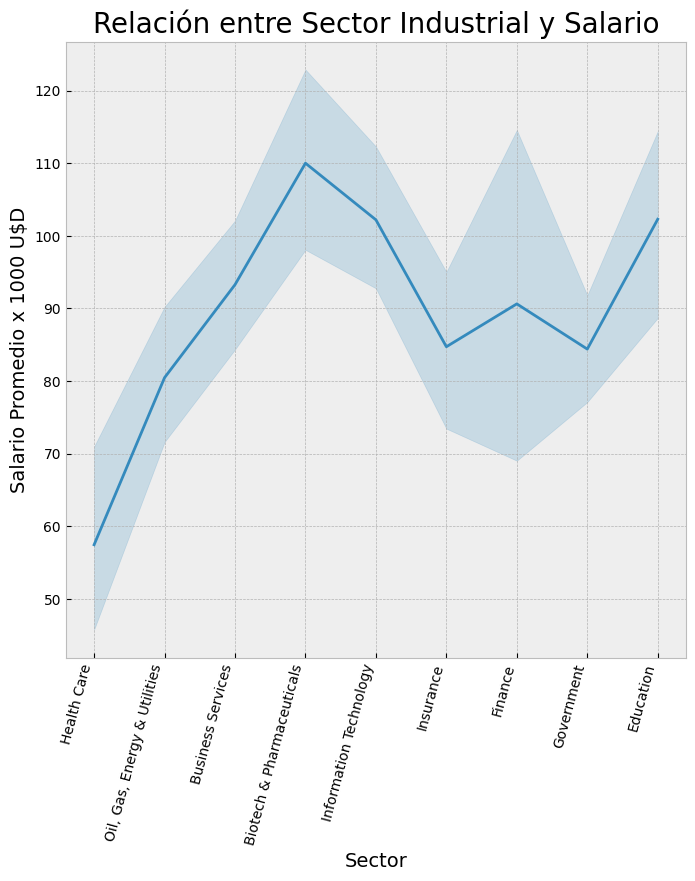

In [81]:
plt.figure(figsize=(8,8))
sns.lineplot(data = df_filtrado2,
             x = 'Sector',
             y = 'avg_salary')
plt.title('Relación entre Sector Industrial y Salario', fontsize=20)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Salario Promedio x 1000 U$D', fontsize=14)

plt.xticks(rotation=75, ha='right')

plt.show()

> Se puede analizar desde el grafico que el sector con mas alto salario es **Biotech & Pharmaceuticals** mientras que el menor es **Health Care**. Por otro lado se puede ver que en el sector de **Finance** existe una gran variedad de salarios. Por lo que respondiendo a la pregunta numero 3, *si existe una relación entre el Sector y el Salario*